In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
url = 'url.csv'
df = pd.read_csv(url)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


this shows that we have 14 columns in total besides index, and we have 110527 record.

patientId is float while it supposed to be an integer.

Convert Scheduled and Appointment columns to date time.

Remove Row(s) with Negative Age Value(s):

In [4]:
df.shape

(110527, 14)

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
 df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.duplicated().sum()

0


### Data Cleaning

 **1 - Edit the "ScheduledDay", and "AppointmentDay" Columns' Datatype to be Datetime**

In [170]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [171]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [173]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


2 - Edit "PatientId" Column Datatype to be integer:

In [174]:
df['PatientId'] = df['PatientId'].astype(int)

In [175]:
# make sure the datatype changed
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int32              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

#### let's explore for extreme values

In [176]:
df.max()

PatientId                        2141273554
AppointmentID                       5790484
Gender                                    M
ScheduledDay      2016-06-08 20:07:23+00:00
AppointmentDay    2016-06-08 00:00:00+00:00
Age                                     115
Neighbourhood                    VILA RUBIM
Scholarship                               1
Hipertension                              1
Diabetes                                  1
Alcoholism                                1
Handcap                                   4
SMS_received                              1
No-show                                 Yes
dtype: object

In [177]:
df.min()

PatientId                       -2147483648
AppointmentID                       5030230
Gender                                    F
ScheduledDay      2015-11-10 07:13:56+00:00
AppointmentDay    2016-04-29 00:00:00+00:00
Age                                      -1
Neighbourhood                     AEROPORTO
Scholarship                               0
Hipertension                              0
Diabetes                                  0
Alcoholism                                0
Handcap                                   0
SMS_received                              0
No-show                                  No
dtype: object

#### here we found there is a nagative value in age, so let drop it as it's illogical to have an age by negative 

3- Remove Row(s) with Negative Age Value(s):

In [178]:
df[df["Age"]<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,-2147483648,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


**there is only one row with this problem, so let's drop it** 

In [179]:
df = df.drop([99832])

In [180]:
# check if the problem still there 
df[df["Age"]<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


<a id='eda'></a>
## Exploratory Data Analysis


(Q1) What is the percentage of patients who show up on their appointements vs. who don't?

In [181]:
number_no_show_up = df[df["No-show"] == 'Yes']["PatientId"].count()
number_no_show_up

22319

In [182]:
number_show_up = df[df['No-show'] == 'No']['PatientId'].count()
number_show_up

88207

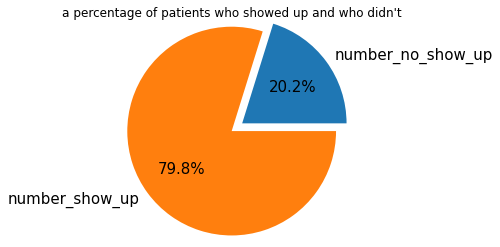

In [183]:
names = ['number_no_show_up', 'number_show_up']
results = [22319 , 88207]
plt.axis('equal')
plt.title("a percentage of patients who showed up and who didn't")
plt.pie(results, labels=names, explode=(0.15, 0), radius=1.2, autopct='%0.1f%%', textprops = {"fontsize":15});

## This indicate that the patient who shows up to thier appointment is 79.8%
## and the patients who didn't who up to thier appointment is 20.2% .

## (Q2)  Does the period between the scheduled day appointment and the actual appointment day is influencing the attendance?

In [184]:
# get duration between the two dates 
df['waiting'] = (df['AppointmentDay'].dt.date) - (df['ScheduledDay'].dt.date)

In [185]:
# remove the days text 
df['waiting'] = df['waiting'].dt.days

In [186]:
# get the average of both patients who did show up and who didn't 
waitTime = df.groupby('No-show')['waiting'].mean()
waitTime

No-show
No      8.754759
Yes    15.831489
Name: waiting, dtype: float64

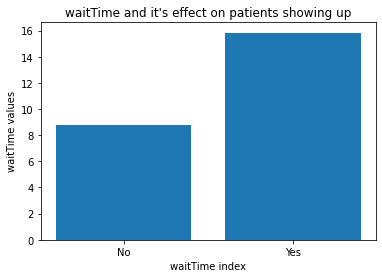

In [187]:
plt.bar(waitTime.index, waitTime.values)
plt.title("waitTime and it's effect on patients showing up")
plt.xlabel('waitTime index')
plt.ylabel('waitTime values');

##### this indcate that patients who attend have a less waiting time than patients who don’t
##### patients whom didn't show up have an average of 15 days of waiting before the appointment 
##### patients whom did show up have an average of 8 days of waiting before the appointment 


### (Q3) where is the most appointment take place ?

In [188]:
df['Neighbourhood'].mode()[0]

'JARDIM CAMBURI'

##### here it shows us that most appointment has been in **JARDIM CAMBURI** Neighbourhood

### (Q4) Does Hipertension effects the patients showing up  ?

In [189]:
Hipertension_effect = df.groupby(['No-show','Hipertension'], as_index=False).size()
Hipertension_effect

,No-show,Hipertension,size
0,No,0,70178
1,No,1,18029
2,Yes,0,18547
3,Yes,1,3772


In [190]:
# let's get the mean of patients that have Hipertension for who attended and whom are not 
# no == they actully attended 
# yes == they they didn't attend

df.groupby('No-show')['Hipertension'].mean()

No-show
No     0.204394
Yes    0.169004
Name: Hipertension, dtype: float64

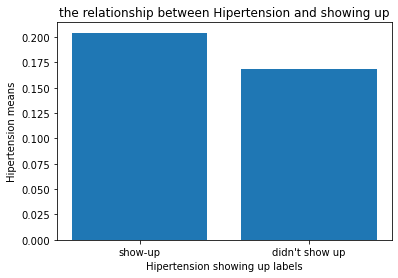

In [191]:
hiper_labels = ["show-up", "didn't show up"]
means_data = [0.204394 , 0.169004]
plt.bar(hiper_labels , means_data)
plt.title('the relationship between Hipertension and showing up')
plt.xlabel('Hipertension showing up labels')
plt.ylabel('Hipertension means');

#### This indicate that Hipertension doesn't have a direct effect on patients show up or not as it marely made a difference between both cases

### (Q5) Who is more committed to medical schedules older patients or younger ones ?

In [192]:
# let's first categorize ages:
bins = [0,5,15,20,50,120]
labels = ['child', 'kid', 'teen', 'adult', 'elderly']
df['age_segmentation'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [193]:
# let's calculate mean for each category 
df.groupby('age_segmentation')['No-show'].value_counts()

age_segmentation  No-show
child             No          8377
                  Yes         1865
kid               No          9954
                  Yes         3061
teen              No          5339
                  Yes         1815
adult             No         33519
                  Yes         9560
elderly           No         31018
                  Yes         6018
Name: No-show, dtype: int64

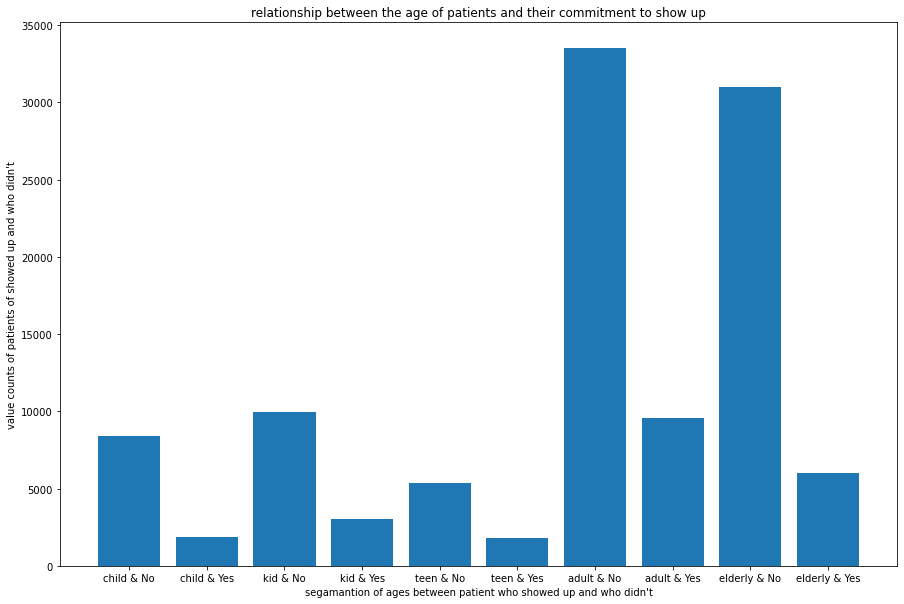

In [194]:
labels = ["child & No","child & Yes","kid & No", "kid & Yes", "teen & No", "teen & Yes", "adult & No", "adult & Yes", "elderly & No", "elderly & Yes"]
data = [8377, 1865, 9954, 3061, 5339, 1815, 33519, 9560, 31018, 6018]
plt.figure(figsize=(15,10)) 
plt.bar(x=labels, height=data)
plt.title('relationship between the age of patients and their commitment to show up')
plt.ylabel("value counts of patients of showed up and who didn't")
plt.xlabel("segamantion of ages between patient who showed up and who didn't");

# the above analysis indicate that older patients are more committed to showing up than younger patients 
# as the differance between showing up or not for elders and adults are higher than the younger ones 
# the graph shows us significant increase in showing up for older patients 

### alcohol doesn't make patients miss their appointments cuase most of them had shown up  

## as shown in the above table the handicap does signfically effect showing up for the patients becuase everytime it increase by one
## the showing up of patients decreases 


In [198]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#### Import necessary libraries

In [199]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

# ML Algorithms imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# imports for evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [200]:
# zero_one function to convert a column with 2 values to zeros and ones
def zero_one(data, column):
    """
    This function turns a dataframe's column with 2 values into zeros and ones.
    
    Key Arguments:
    data   -- a Dataframe 
    column -- column name dtype(string) 
    """
    data[column].replace({data[column].unique()[0]:0, data[column].unique()[1]:1}, inplace=True)
    # Changing NoShow and Gender values to zeros and ones 
zero_one(df, 'No-show')
zero_one(df, 'Gender')

# Dropping unnecessary columns

In [201]:
df.drop(['AppointmentDay', 'ScheduledDay', 'PatientId', 'AppointmentID','age_segmentation'], axis = 1, inplace =True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting
0,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,1,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,0,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,0,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


# Dropping biased neighbourhood for having no sufficient number of patients data.

In [202]:
df = df[(df.Neighbourhood !='ILHAS OCEÂNICAS DE TRINDADE') & (df.Neighbourhood !='PARQUE INDUSTRIAL')]
df.Neighbourhood.nunique()

79

In [203]:
label_encoder = LabelEncoder()
df['Neighbourhood'] = label_encoder.fit_transform(df['Neighbourhood'])
df.sample()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting
18120,0,0,40,0,0,0,0,0,0,0,0


In [204]:
X = df.drop('No-show', axis =1)
y = df['No-show']

In [205]:
# data train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=26)

##                         Building models

Defining a function to fit, predict and evaluate each model.

In [206]:
# fitting and evaluating function
def fit_evaluate(cl, parameters):
    """
    this functions takes a classifier and its parameters to fit 
    a gridsearch, predict target values and evaluate the model
    
    Key Arguments:
    cl         -- classifier instantiation 
    parameters -- classifier parameters
    """
    
    # instantiate grid search with specified parameters
    cv = GridSearchCV(cl, parameters, n_jobs=-1)
    
    # Fit to the training set
    cv.fit(X_train, y_train)

    # Predict the labels of the test set: y_pred
    y_pred = cv.predict(X_test)

    # Compute and print metrics
    print("Accuracy: {} ".format(cv.score(X_test, y_test)))
    print('-' * 60)
    print('confusion matrix:\n{}'.format(confusion_matrix(y_test, y_pred, labels=y.unique())))
    print('-' * 60)
    print('classification report:\n\n{}'.format(classification_report(y_test, y_pred)))
    print('-' * 60)
    print("Tuned Model Parameters: {}".format(cv.best_params_))

## Logistic regression classifier

In [207]:
# instantiate classifier
cl1 = LogisticRegression(n_jobs =-1)

# instantiate grid search with specified parameters
parameters1 = {'penalty' : ['l2','none'], 'tol':[0.0003,0.001]}

# fit, predict and evaluate
fit_evaluate(cl1, parameters1)

Accuracy: 0.797056428506801 
------------------------------------------------------------
confusion matrix:
[[26319   222]
 [ 6507   109]]
------------------------------------------------------------
classification report:

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     26541
           1       0.33      0.02      0.03      6616

    accuracy                           0.80     33157
   macro avg       0.57      0.50      0.46     33157
weighted avg       0.71      0.80      0.72     33157

------------------------------------------------------------
Tuned Model Parameters: {'penalty': 'l2', 'tol': 0.0003}


## Random Forest Classifier

In [208]:
# instantiate classifier
cl2 = RandomForestClassifier(random_state=26, n_jobs = -1)

# instantiate grid search with specified parameters
parameters2 ={'n_estimators':[100,120],'min_samples_split':[5,7,9]}

# fit, predict and evaluate
fit_evaluate(cl2, parameters2)

Accuracy: 0.792803932804536 
------------------------------------------------------------
confusion matrix:
[[25403  1138]
 [ 5732   884]]
------------------------------------------------------------
classification report:

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     26541
           1       0.44      0.13      0.20      6616

    accuracy                           0.79     33157
   macro avg       0.63      0.55      0.54     33157
weighted avg       0.74      0.79      0.75     33157

------------------------------------------------------------
Tuned Model Parameters: {'min_samples_split': 9, 'n_estimators': 120}


## K-Nearest Neighbors Classifier

In [210]:
# instantiate classifier
cl3 = KNeighborsClassifier(n_jobs=-1)

# instantiate grid search with specified parameters
parameters3 = {'n_neighbors':[4,5,6,7]}

# fit, predict and evaluate
fit_evaluate(cl3, parameters3)

Accuracy: 0.7906022860934343 
------------------------------------------------------------
confusion matrix:
[[25493  1048]
 [ 5895   721]]
------------------------------------------------------------
classification report:

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     26541
           1       0.41      0.11      0.17      6616

    accuracy                           0.79     33157
   macro avg       0.61      0.53      0.53     33157
weighted avg       0.73      0.79      0.74     33157

------------------------------------------------------------
Tuned Model Parameters: {'n_neighbors': 6}


<a id='conclusions'></a>
## Conclusions
Percentage of patients who show up on their appointments represents 79.8%

Percentage of patients who Don't show up on their appointments represents 20.2%

Patients who attend have a less waiting time than patients who don’t

Patients whom didn't show up have an average of 15 days of waiting before the appointment

Patients whom did show up have an average of 8 days of waiting before the appointment

Most appointment has been in JARDIM CAMBURI Neighbourhood

Hypertension doesn't have a direct effect on patients show up or not as it marely made a difference between both cases

Older patients are more committed to showing up than younger patients 

## This is my Graduation project, i use this dataset to work on my graduation project. I should've used a dataset from Sierra Leone, but unfortunately, i didn't find any, to work on this type of project.
## I will produce it, as soon as the dataset is available. Thanks......